In [28]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# 単回帰モデルのパラメータ推定

次のようなモデルを考える．

$$
Y_i = \alpha + \beta X_i + u_i \\
u_i \sim N(0,\sigma^2)
$$

最初のゴールは次を理解すること．

前提として，$(X_i, Y_i), i=1,2,\ldots,n$は所与である．  

1. モデルのパラメータをどう推定するのか
1. モデルの説明力をどう測るか
1. $X$が$Y$に対してどの程度重要なのか，またそれをどう測るか
1. 新たな$X_0$に対する$Y$の予測


# 正規線形モデル  

正規線形モデルとは次の５つの仮定が成立しているという元でのモデルである．  

1. 
$$
    E(u_i) = 0, i=1,2,\ldots,n
$$

1. 
$$
    E(u_i^2) = \sigma^2, i=1,2,\ldots,n
$$

1. 
$$
    E(u_i u_j) = 0, i \neq j, i,j = 1,2,\ldots,n
$$

1. $X$は指定変数．分析の際は$X$の水準を固定できるという意味．この時においては$X$は確率変数ではない

1. 
$$
    u \sim N(\mu, \sigma^2)
$$

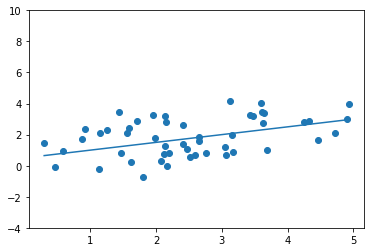

In [24]:
# 均一分散の場合のデータ
np.random.seed(123)

alpha = 0.5
beta = 0.5
x = np.random.rand(50) * 5
u = np.random.randn(50)
y = alpha + beta * x + u

lx = np.linspace(min(x), max(x), x.size)

plt.scatter(x, y)
plt.plot(lx, alpha + beta * lx)
plt.ylim(-4,10)
plt.show()

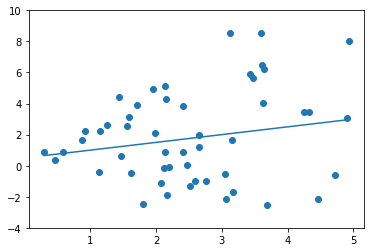

In [25]:
np.random.seed(123)

alpha = 0.5
beta = 0.5
x = np.random.rand(50) * 5
u = np.random.randn(50) * x
y = alpha + beta * x + u

lx = np.linspace(min(x), max(x), x.size)

plt.scatter(x, y)
plt.plot(lx, alpha + beta * lx)
plt.ylim(-4, 10)
plt.show()

### 散布図による関数形の確認  

次の関数形にしたがって確率的なごさを含むYを生成してみよう

$$
\begin{aligned}
 Y &= \alpha + \beta \left( \frac{1}{X} \right) \\
 \log(Y) &= \alpha + \beta \log(X), \hspace{4mm} 0 < \beta < 1 \\
 \log(Y) &= \alpha + \beta \log(X), \hspace{4mm} \beta > 1 \\
 \log(Y) &= \alpha + \beta X, \hspace{4mm} 
\end{aligned} 
$$

In [41]:
def f1(x, alpha, beta):
    return alpha + beta * (1/x)

In [37]:
def f2(x, alpha, beta):
    return alpha + beta * np.log(x)

In [75]:
def f3(x, alpha, beta):
    return np.exp(alpha + beta * x)

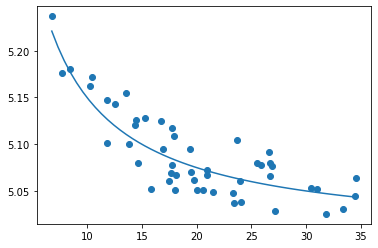

In [52]:
np.random.seed(123)

alpha = 5
beta = 1.5

x = np.random.rand(50) * 30 + 5
u = np.random.randn(50) * 0.02
y = f1(x, alpha, beta) + u

lx = np.linspace(min(x), max(x), x.size)

plt.scatter(x, y)
plt.plot(lx, f1(lx, alpha, beta))
plt.show()

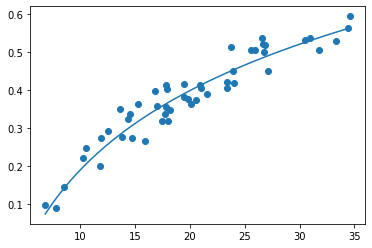

In [64]:
np.random.seed(123)

alpha = -0.5
beta = 0.3

x = np.random.rand(50) * 30 + 5
u = np.random.randn(50) * 0.03
y = f2(x, alpha, beta) + u

lx = np.linspace(min(x), max(x), x.size)

plt.scatter(x, y)
plt.plot(lx, f2(lx, alpha, beta))
plt.show()

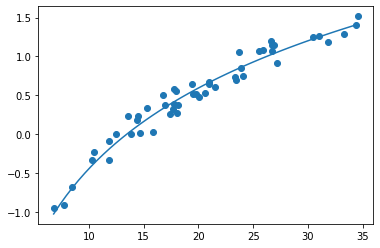

In [69]:
np.random.seed(123)

alpha = -3.9
beta = 1.5

x = np.random.rand(50) * 30 + 5
u = np.random.randn(50) * 0.1
y = f2(x, alpha, beta) + u

lx = np.linspace(min(x), max(x), x.size)

plt.scatter(x, y)
plt.plot(lx, f2(lx, alpha, beta))
plt.show()

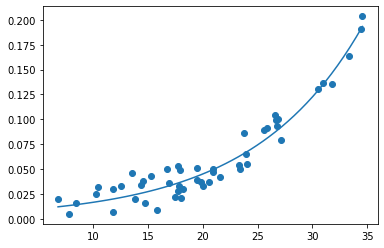

In [77]:
np.random.seed(123)

alpha = -5.1
beta = 0.1

x = np.random.rand(50) * 30 + 5
u = np.random.randn(50) * 0.01
y = f3(x, alpha, beta) + u

lx = np.linspace(min(x), max(x), x.size)

plt.scatter(x, y)
plt.plot(lx, f3(lx, alpha, beta))
plt.show()